In [1]:
! pip install numpy pandas plotly scipy matplotlib scikit-learn

In [2]:
import numpy as np
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.express as px
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
from PIL import Image
from sklearn.decomposition import PCA

In [3]:
faces_image = 'data/faces/rawdata'
example = 0.2
Value = []
for numberFile in  os.listdir(faces_image):
    if random.random() <= example:
        value_bytes = open(os.path.join(faces_image, numberFile), "rb").read()
        imageFace = Image.frombytes('L', (128,128), value_bytes)
        Value.append(np.array(imageFace).flatten())
Value = np.array(Value)

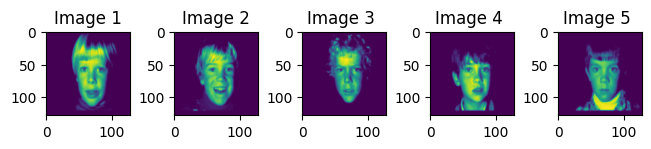

In [4]:
def five_images_homework(images, image_one, image_two, image_three, image_four, image_five):
    figure_size = lambda X: X.reshape(128,128)
    figure, ax = plt.subplots(1,5, constrained_layout=True)
    ax[0].imshow(figure_size(images[image_one]))
    ax[0].set_title(label="Image %s"% image_one)
    ax[1].imshow(figure_size(images[image_two]))
    ax[1].set_title(label="Image %s"% image_two)
    ax[2].imshow(figure_size(images[image_three]))
    ax[2].set_title(label="Image %s "% image_three)
    ax[3].imshow(figure_size(images[image_four]))
    ax[3].set_title(label="Image %s "% image_four)
    ax[4].imshow(figure_size(images[image_five]))
    ax[4].set_title(label="Image %s "% image_five)
    plt.show()

five_images_homework(Value, 1, 2, 3, 4, 5)

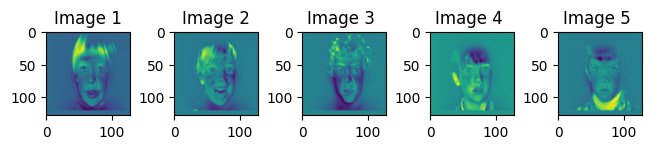

In [5]:
#1.1 Se calcula la mean Face

Value_mean = Value.mean(axis=0)
Value_center = Value - Value_mean
five_images_homework(Value_center, 1, 2, 3, 4, 5)

#Se resta la media a cada imagen formando así una reducción de pixeles en las imagenes.

In [8]:
#1.2 Centralizar datos y utilizar con 200 componentes
pca_faces_images = PCA(n_components=200)
Value_reduced_pca = pca_faces_images.fit_transform(Value_center)
eigen_values_images = pca_faces_images.explained_variance_
eigen_vector_images = pca_faces_images.components_

In [9]:
#Se hace el caclulo de las componentes necesarios para mantener las caras
def percentage_componentes_images(percentage):
    size_list = len(eigen_values)
    numerator = 0
    denominator = 0
    for interaction_denominator in range(size_list):
        denominator = denominator + eigen_values[interaction_denominator]
    for interaction_numerator in range(size_list):
        numerator = numerator + eigen_values[interaction_numerator]/denominator
        if numerator >= percentage:
            return interaction_numerator

print("Número de componentes para el 100% de la varianza:", percentage_componentes_images(1)+1)
#Cuando se calcula el 100% de las caracteristicas se obtiene 199 componentes, debria de ser 200, por ende se suma 1 al resultado

print("Número de componentes para el 90% de la varianza:", percentage_componentes_images(0.90)+1)
#Con 63 componentes obtenemos el 90% de las caracteristicas, de esta manera nos indica que los primeros 64 componenetes pueden explicar el 90% de la
#varianza drinadndo imagenes claras

Número de componentes para el 100% de la varianza: 200
Número de componentes para el 90% de la varianza: 48


In [10]:
#Se crea una función para obtener una imagen para ver una imagen
def one_image_homework(image, label="Image Face 1", ax=None):
    figure_size = lambda X: X.reshape(128,128)
    fig_face = None
    if ax is None:
        fig_face, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(figure_size(image))
    ax.set_title(label=label)
    return fig_face, ax

In [11]:
#Antes de reconstruir los datos se obtendrá el número de componentes para el 85% y el 99%
print("Número de componentes para el 85% de la varianza:", percentage_componentes_images(0.85)+1)

print("Número de componentes para el 99% de la varianza:", percentage_componentes_images(0.99)+1)

Número de componentes para el 85% de la varianza: 29
Número de componentes para el 99% de la varianza: 162


(None, <Axes: title={'center': 'Con 99% eigenfaces'}>)

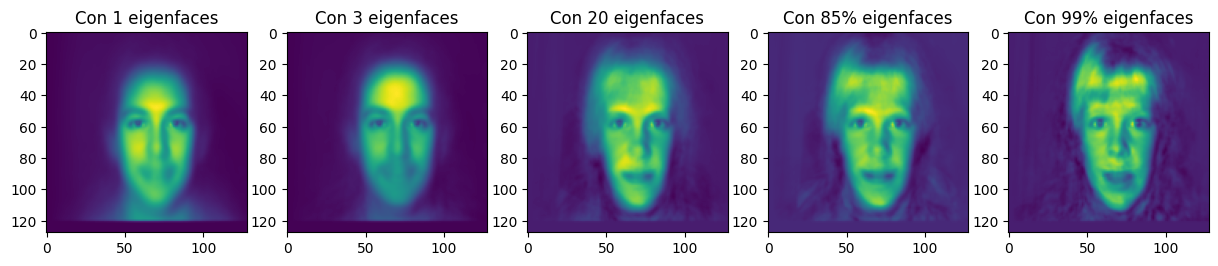

In [16]:
#Imagen 1
image_1_component = Value_mean + np.sum(np.dot(Value_reduced_pca[1].reshape(1,-1)[:,:1], eigen_vector_images[:1,:]), axis=0)
image_5_component = Value_mean + np.sum(np.dot(Value_reduced_pca[1].reshape(1,-1)[:,:3], eigen_vector_images[:3,:]), axis=0)
image_20_component = Value_mean + np.sum(np.dot(Value_reduced_pca[1].reshape(1,-1)[:,:20],  eigen_vector_images[:20,:]), axis=0)
image_85_percetage = Value_mean + np.sum(np.dot(Value_reduced_pca[1].reshape(1,-1)[:,:29], eigen_vector_images[:29,:]),  axis=0)
image_99_percetage = Value_mean + np.sum(np.dot(Value_reduced_pca[1].reshape(1,-1)[:,:162], eigen_vector_images[:162,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))

one_image_homework(image_1_component, ax=ax[0],label="Con 1 eigenfaces")
one_image_homework(image_5_component, ax=ax[1],label="Con 3 eigenfaces")
one_image_homework(image_20_component, ax=ax[2],label="Con 20 eigenfaces")
one_image_homework(image_85_percetage, ax=ax[3],label="Con 85% eigenfaces")
one_image_homework(image_99_percetage, ax=ax[4],label="Con 99% eigenfaces")

(None, <Axes: title={'center': 'Con 99% eigenfaces'}>)

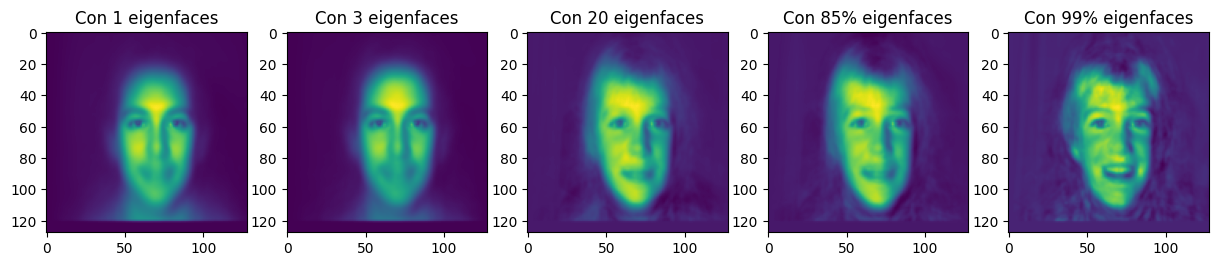

In [18]:
#Imagen 2
image_1_component = Value_mean + np.sum(np.dot(Value_reduced_pca[2].reshape(1,-1)[:,:1], eigen_vector_images[:1,:]), axis=0)
image_5_component = Value_mean + np.sum(np.dot(Value_reduced_pca[2].reshape(1,-1)[:,:3], eigen_vector_images[:3,:]), axis=0)
image_20_component = Value_mean + np.sum(np.dot(Value_reduced_pca[2].reshape(1,-1)[:,:20],  eigen_vector_images[:20,:]), axis=0)
image_85_percetage = Value_mean + np.sum(np.dot(Value_reduced_pca[2].reshape(1,-1)[:,:29], eigen_vector_images[:29,:]),  axis=0)
image_99_percetage = Value_mean + np.sum(np.dot(Value_reduced_pca[2].reshape(1,-1)[:,:162], eigen_vector_images[:162,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))

one_image_homework(image_1_component, ax=ax[0],label="Con 1 eigenfaces")
one_image_homework(image_5_component, ax=ax[1],label="Con 3 eigenfaces")
one_image_homework(image_20_component, ax=ax[2],label="Con 20 eigenfaces")
one_image_homework(image_85_percetage, ax=ax[3],label="Con 85% eigenfaces")
one_image_homework(image_99_percetage, ax=ax[4],label="Con 99% eigenfaces")

(None, <Axes: title={'center': 'Con 99% eigenfaces'}>)

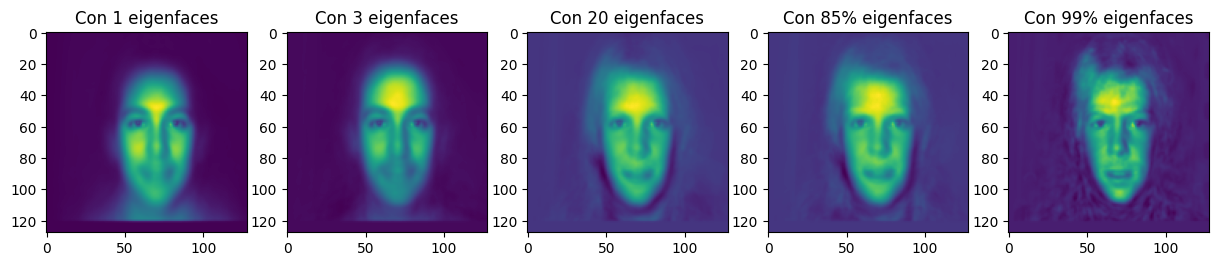

In [22]:
#Imagen 3
image_1_component = Value_mean + np.sum(np.dot(Value_reduced_pca[3].reshape(1,-1)[:,:1], eigen_vector_images[:1,:]), axis=0)
image_3_component = Value_mean + np.sum(np.dot(Value_reduced_pca[3].reshape(1,-1)[:,:3], eigen_vector_images[:3,:]), axis=0)
image_20_component = Value_mean + np.sum(np.dot(Value_reduced_pca[3].reshape(1,-1)[:,:20],  eigen_vector_images[:20,:]), axis=0)
image_85_percetage = Value_mean + np.sum(np.dot(Value_reduced_pca[3].reshape(1,-1)[:,:29], eigen_vector_images[:29,:]),  axis=0)
image_99_percetage = Value_mean + np.sum(np.dot(Value_reduced_pca[3].reshape(1,-1)[:,:162], eigen_vector_images[:162,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))

one_image_homework(image_1_component, ax=ax[0],label="Con 1 eigenfaces")
one_image_homework(image_3_component, ax=ax[1],label="Con 3 eigenfaces")
one_image_homework(image_20_component, ax=ax[2],label="Con 20 eigenfaces")
one_image_homework(image_85_percetage, ax=ax[3],label="Con 85% eigenfaces")
one_image_homework(image_99_percetage, ax=ax[4],label="Con 99% eigenfaces")

(None, <Axes: title={'center': 'Con 99% eigenfaces'}>)

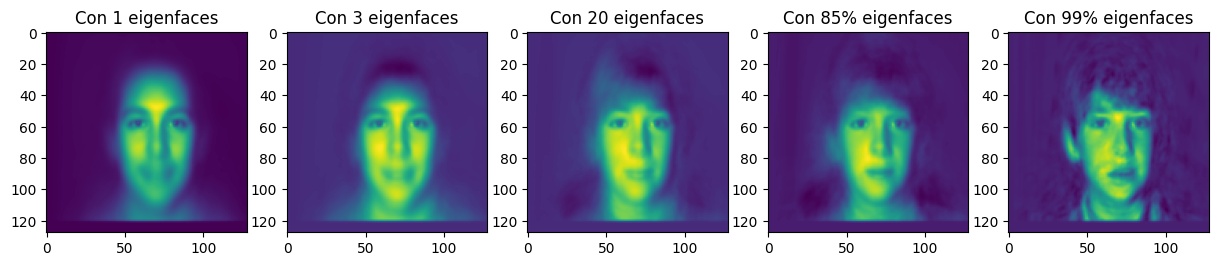

In [23]:
#Imagen 4
image_1_component = Value_mean + np.sum(np.dot(Value_reduced_pca[4].reshape(1,-1)[:,:1], eigen_vector_images[:1,:]), axis=0)
image_3_component = Value_mean + np.sum(np.dot(Value_reduced_pca[4].reshape(1,-1)[:,:3], eigen_vector_images[:3,:]), axis=0)
image_20_component = Value_mean + np.sum(np.dot(Value_reduced_pca[4].reshape(1,-1)[:,:20],  eigen_vector_images[:20,:]), axis=0)
image_85_percetage = Value_mean + np.sum(np.dot(Value_reduced_pca[4].reshape(1,-1)[:,:29], eigen_vector_images[:29,:]),  axis=0)
image_99_percetage = Value_mean + np.sum(np.dot(Value_reduced_pca[4].reshape(1,-1)[:,:162], eigen_vector_images[:162,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))

one_image_homework(image_1_component, ax=ax[0],label="Con 1 eigenfaces")
one_image_homework(image_3_component, ax=ax[1],label="Con 3 eigenfaces")
one_image_homework(image_20_component, ax=ax[2],label="Con 20 eigenfaces")
one_image_homework(image_85_percetage, ax=ax[3],label="Con 85% eigenfaces")
one_image_homework(image_99_percetage, ax=ax[4],label="Con 99% eigenfaces")

(None, <Axes: title={'center': 'Con 99% eigenfaces'}>)

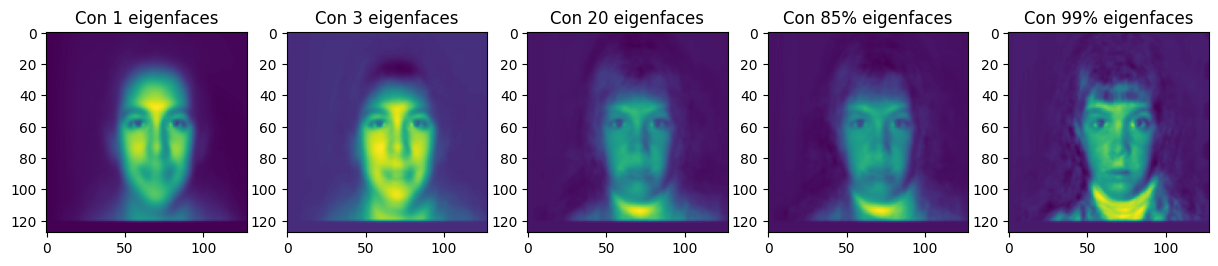

In [24]:
#Imagen 5
image_1_component = Value_mean + np.sum(np.dot(Value_reduced_pca[5].reshape(1,-1)[:,:1], eigen_vector_images[:1,:]), axis=0)
image_3_component = Value_mean + np.sum(np.dot(Value_reduced_pca[5].reshape(1,-1)[:,:3], eigen_vector_images[:3,:]), axis=0)
image_20_component = Value_mean + np.sum(np.dot(Value_reduced_pca[5].reshape(1,-1)[:,:20],  eigen_vector_images[:20,:]), axis=0)
image_85_percetage = Value_mean + np.sum(np.dot(Value_reduced_pca[5].reshape(1,-1)[:,:29], eigen_vector_images[:29,:]),  axis=0)
image_99_percetage = Value_mean + np.sum(np.dot(Value_reduced_pca[5].reshape(1,-1)[:,:162], eigen_vector_images[:162,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))

one_image_homework(image_1_component, ax=ax[0],label="Con 1 eigenfaces")
one_image_homework(image_3_component, ax=ax[1],label="Con 3 eigenfaces")
one_image_homework(image_20_component, ax=ax[2],label="Con 20 eigenfaces")
one_image_homework(image_85_percetage, ax=ax[3],label="Con 85% eigenfaces")
one_image_homework(image_99_percetage, ax=ax[4],label="Con 99% eigenfaces")

In [25]:
#Se puede concluir que cuando se tiene una sola componente todas la imagenes tienden a una figura similar dando enteder que cuando hay pocas componentes
#todas las imagenes cormparten esa caracteristica, dando a entender una mayor confusión y teniendo que buscar más datos para mejorar la figura, se 
#aprecia que entre mayores componentes, mejores resultados.